# Project 1. diabetes data
- 목표
    - MSE 손실함수값 3000 이하를 달성
    - 시각화 요구사항이 정확하게 이루어졌는가?

In [106]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.options.display.float_format = '{:.4f}'.format

In [107]:
data = load_diabetes()
dt=np.concatenate((data.data, data.target.reshape(-1, 1)), axis=1)
diabets = pd.DataFrame(data=dt, columns=data.feature_names+['target'])
diabets.head()

age     sex     bmi      bp      s1      s2      s3      s4      s5  \
0  0.0381  0.0507  0.0617  0.0219 -0.0442 -0.0348 -0.0434 -0.0026  0.0199   
1 -0.0019 -0.0446 -0.0515 -0.0263 -0.0084 -0.0192  0.0744 -0.0395 -0.0683   
2  0.0853  0.0507  0.0445 -0.0057 -0.0456 -0.0342 -0.0324 -0.0026  0.0029   
3 -0.0891 -0.0446 -0.0116 -0.0367  0.0122  0.0250 -0.0360  0.0343  0.0227   
4  0.0054 -0.0446 -0.0364  0.0219  0.0039  0.0156  0.0081 -0.0026 -0.0320   

       s6   target  
0 -0.0176 151.0000  
1 -0.0922  75.0000  
2 -0.0259 141.0000  
3 -0.0094 206.0000  
4 -0.0466 135.0000

In [108]:
# 그냥 성별이라 0,1로 바꾸고 싶었음
diabets.loc[diabets['sex'] > 0, 'sex'] = 1
diabets.loc[diabets['sex'] < 0, 'sex'] = 0

In [51]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [18]:
diabets.describe()

age      sex      bmi       bp       s1       s2       s3       s4  \
count 442.0000 442.0000 442.0000 442.0000 442.0000 442.0000 442.0000 442.0000   
mean   -0.0000   0.4683  -0.0000  -0.0000  -0.0000   0.0000  -0.0000  -0.0000   
std     0.0476   0.4996   0.0476   0.0476   0.0476   0.0476   0.0476   0.0476   
min    -0.1072   0.0000  -0.0903  -0.1124  -0.1268  -0.1156  -0.1023  -0.0764   
25%    -0.0373   0.0000  -0.0342  -0.0367  -0.0342  -0.0304  -0.0351  -0.0395   
50%     0.0054   0.0000  -0.0073  -0.0057  -0.0043  -0.0038  -0.0066  -0.0026   
75%     0.0381   1.0000   0.0312   0.0356   0.0284   0.0298   0.0293   0.0343   
max     0.1107   1.0000   0.1706   0.1320   0.1539   0.1988   0.1812   0.1852   

            s5       s6   target  
count 442.0000 442.0000 442.0000  
mean    0.0000   0.0000 152.1335  
std     0.0476   0.0476  77.0930  
min    -0.1261  -0.1378  25.0000  
25%    -0.0332  -0.0332  87.0000  
50%    -0.0019  -0.0011 140.5000  
75%     0.0324   0.0279 211.5000  
max     0.1336   0.1356 346.0000

## 변수 설명
- age :	나이
- sex :	성별
- bmi :	체질량지수(Body Mass Index)
- bp : 평균 혈압
- s1 : 혈청 1 (Serum level 1)
- s2 :	혈청 2 (Serum level 2)
- s3 :	혈청 3 (Serum level 3)
- s4 :	혈청 4 (Serum level 4)
- s5 :	혈청 5 (Serum level 5)
- s6 :	혈청 6 (Serum level 6)

In [174]:
0.02 * 346

6.92

## 간단 EDA

<Axes: >

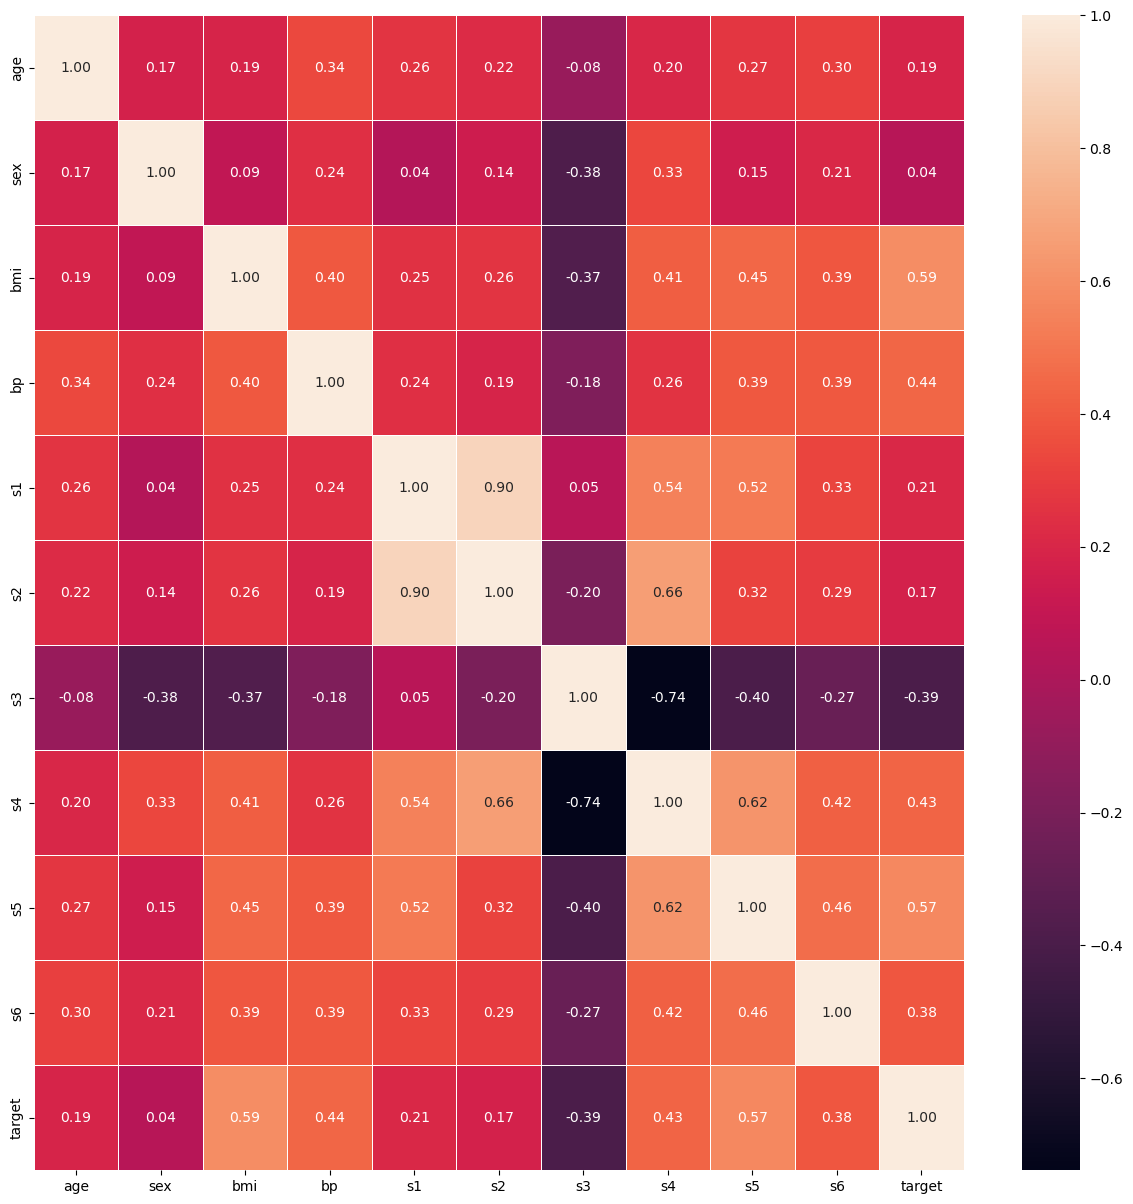

In [19]:
plt.figure(figsize=(15,15)) 
sns.heatmap(data = diabets.corr(), annot=True, fmt = '.2f', linewidths=.5)

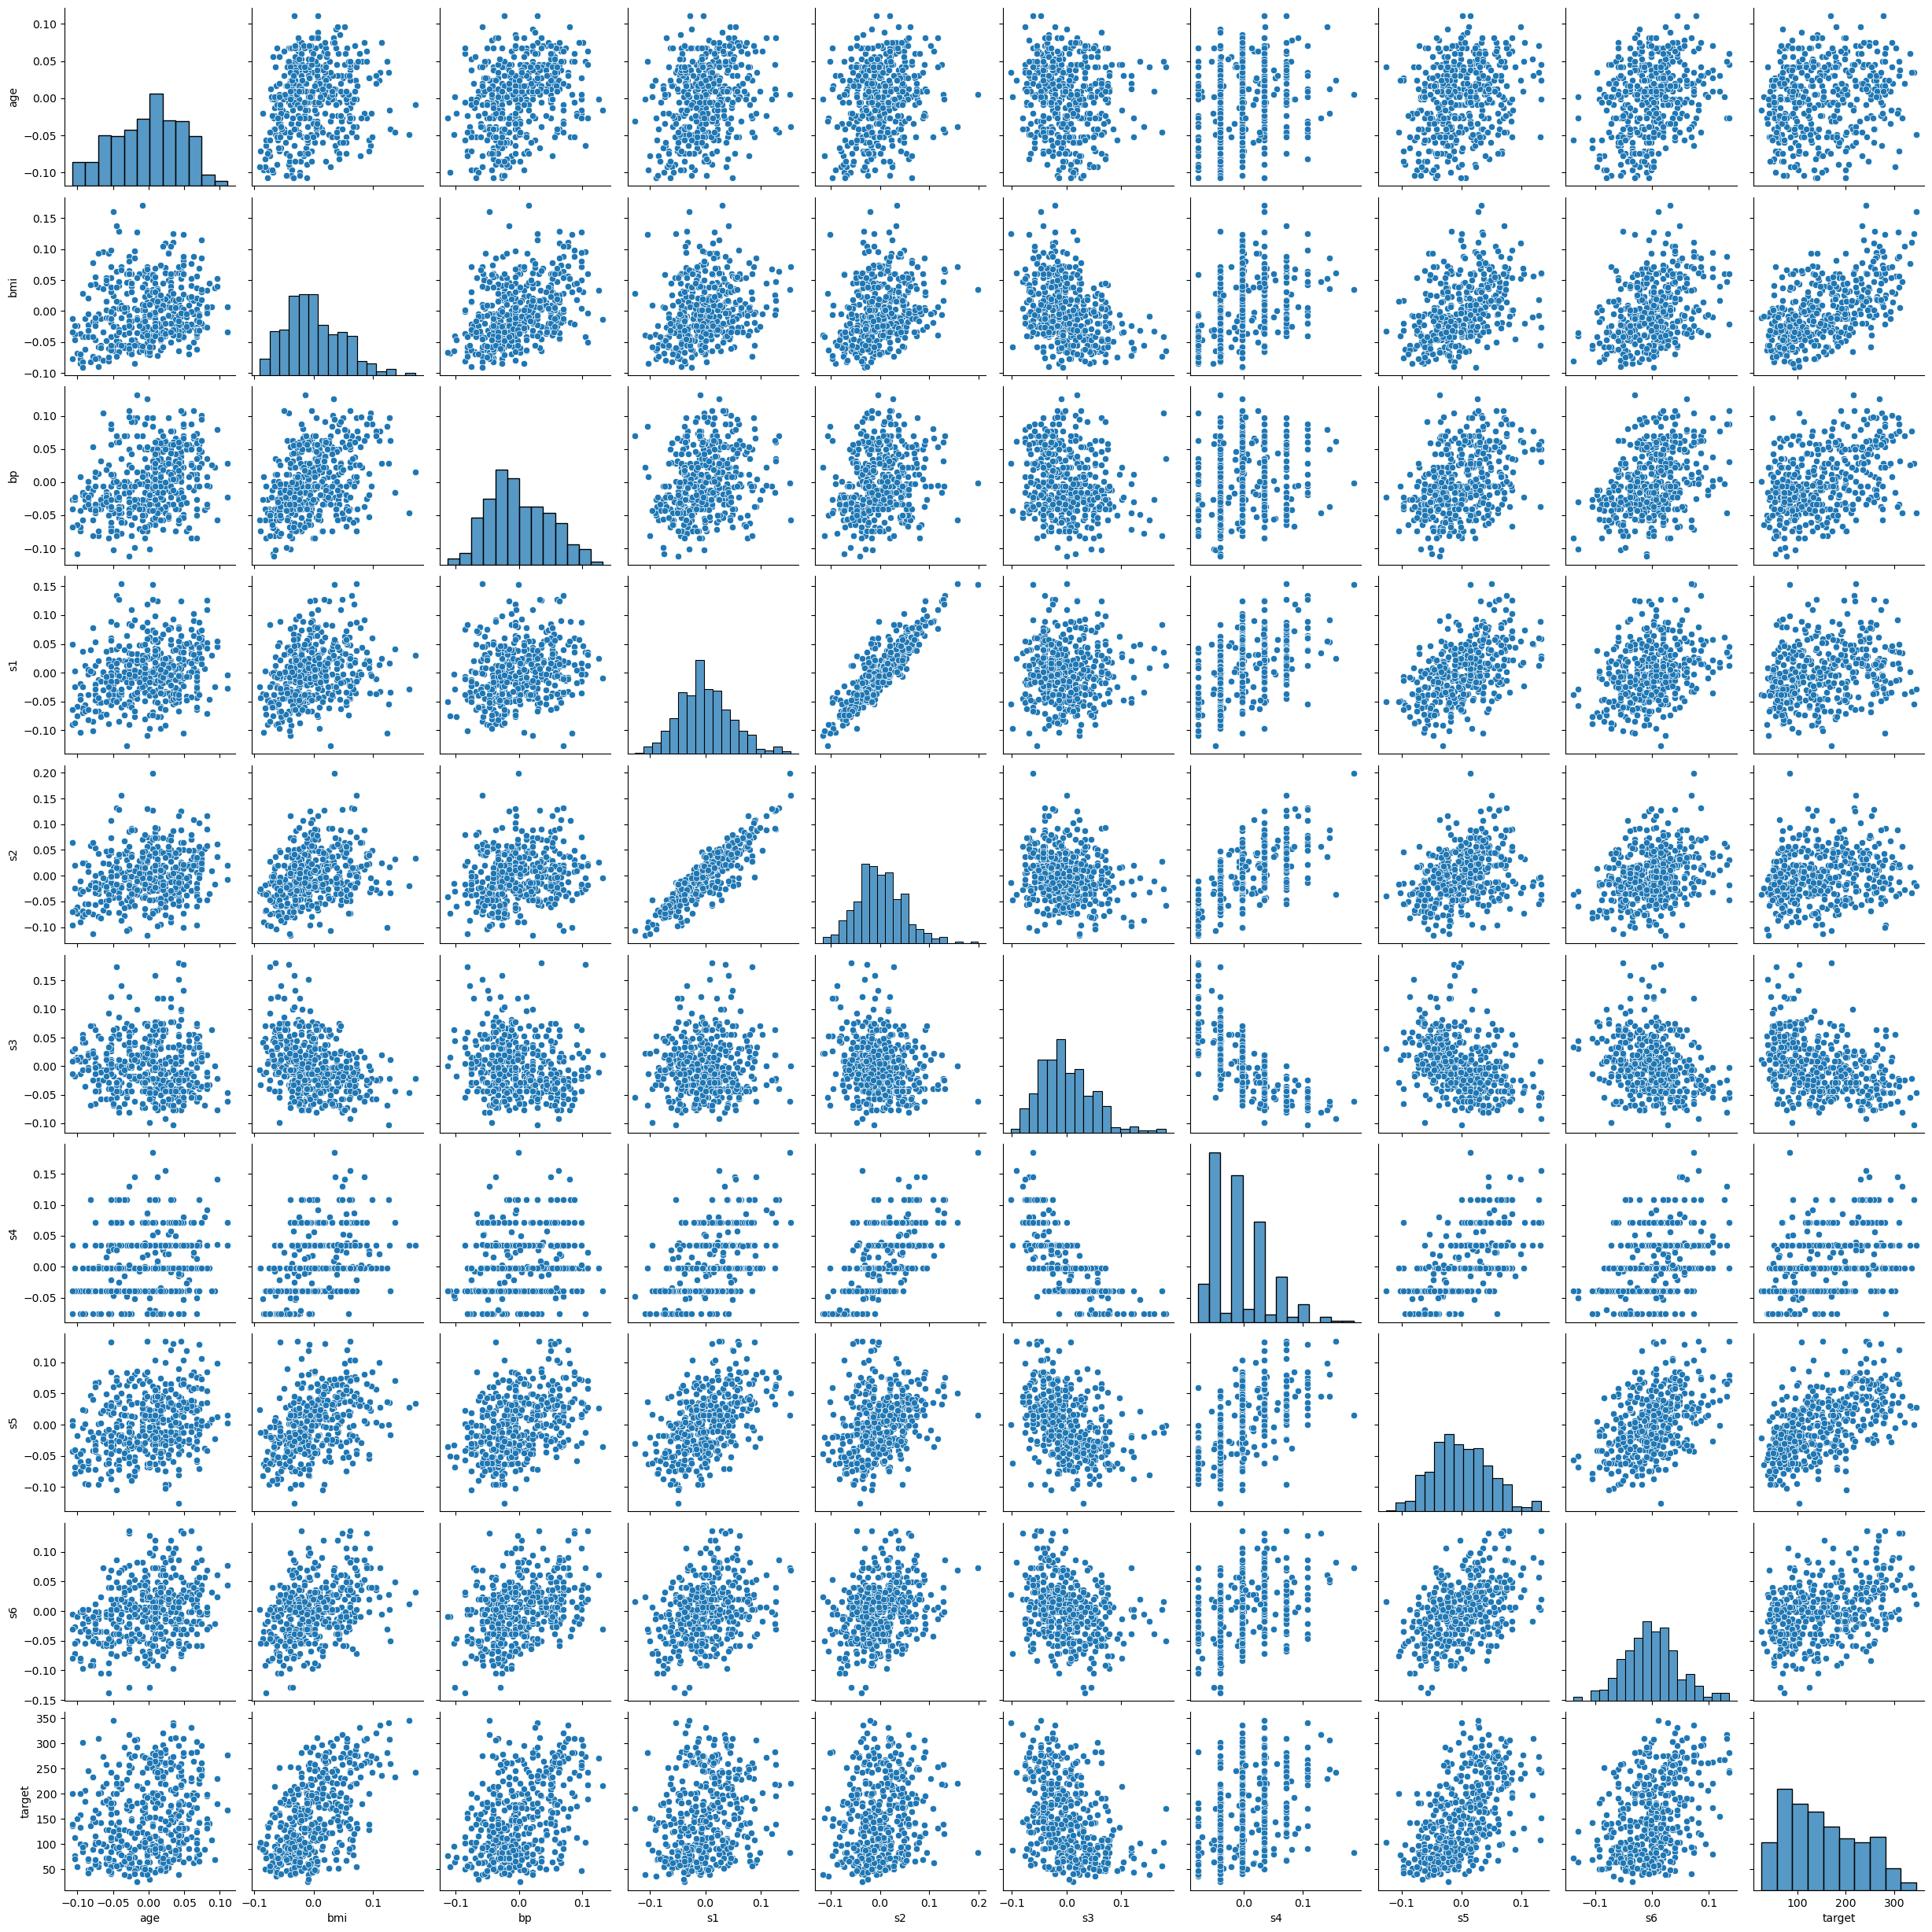

In [125]:
sns.pairplot(data=diabets.drop(columns='sex')) 

In [109]:
data_diabets = diabets.drop(columns='target').copy()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_diabets.values, i) for i in range(data_diabets.shape[1])]
vif["features"] = data_diabets.columns 

vif.sort_values(by="VIF Factor", ascending=False)
# s1 ~ s5 까지 높기때문에 

VIF Factor features
4     59.1284       s1
5     39.1562       s2
6     15.3847       s3
8     10.0757       s5
7      8.8606       s4
2      1.4931      bmi
9      1.4805       s6
3      1.4320       bp
0      1.2110      age
1      1.1308      sex

## 전처리

In [110]:
ss = StandardScaler()
ss_scaler = ss.fit_transform(diabets.drop(columns=['sex','target'], axis=1))
diabets_ss = pd.DataFrame(ss_scaler, columns=diabets.drop(columns=['sex','target']).columns)
diabets_ss = pd.concat([diabets_ss, diabets[['sex','target']]], axis=1)
diabets_ss

age     bmi      bp      s1      s2      s3      s4      s5      s6  \
0    0.8005  1.2971  0.4598 -0.9297 -0.7321 -0.9125 -0.0545  0.4185 -0.3710   
1   -0.0396 -1.0822 -0.5535 -0.1776 -0.4029  1.5644 -0.8303 -1.4366 -1.9385   
2    1.7933  0.9345 -0.1192 -0.9587 -0.7189 -0.6802 -0.0545  0.0602 -0.5452   
3   -1.8724 -0.2438 -0.7706  0.2563  0.5254 -0.7576  0.7213  0.4770 -0.1968   
4    0.1132 -0.7649  0.4598  0.0827  0.3279  0.1712 -0.0545 -0.6725 -0.9806   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
437  0.8769  0.4134  1.2560 -0.1198 -0.0540 -0.6028 -0.0545  0.6558  0.1515   
438 -0.1159 -0.3344 -1.4221  1.0373  1.6644 -0.6028  0.7213 -0.3808  0.9353   
439  0.8769 -0.3344  0.3636 -0.7851 -0.2910 -0.5254 -0.2329 -0.9856  0.3257   
440 -0.9560  0.8212  0.0255  0.3431  0.3213 -0.6028  0.5584  0.9362 -0.5452   
441 -0.9560 -1.5354 -1.7116  1.7605  0.5846  3.6543 -0.8303 -0.0888  0.0644   

       sex   target  
0   1.0000 151.0000  
1   0.0000  75.0000  
2   1.0000 141.0000  
3   0.0000 206.0000  
4   0.0000 135.0000  
..     ...      ...  
437 1.0000 178.0000  
438 1.0000 104.0000  
439 1.0000 132.0000  
440 0.0000 220.0000  
441 0.0000  57.0000  

[442 rows x 11 columns]

In [111]:
pca_col = ['s1', 's2', 's3','s4', 's5']
pca = PCA(n_components=0.9)
pca_scaler = pca.fit_transform(diabets_ss[pca_col])
df_pca = pd.DataFrame(pca_scaler, columns=[f'pca{i}' for i in range(pca_scaler.shape[1])]) 

## 모델

In [112]:
diabets_pca = pd.concat([diabets_ss, df_pca],axis=1)
diabets_pca.columns

Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'sex', 'target',
       'pca0', 'pca1', 'pca2'],
      dtype='object')

In [113]:
feature = ['age', 'bmi', 'bp', 's6'] + list(diabets_pca.loc[:,'pca0':].columns)

X = diabets_pca[feature].to_numpy()
y = diabets_pca.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 7) (353,)
(89, 7) (89,)


In [114]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [115]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

LEARNING_RATE = 0.01 # 학습률로도 굉장히 큰 차이를 보임

In [116]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001): # 사실 epoch 엄청 높이면 계속 내려가긴 함 (심히 과적합)
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3425.3484
Iteration 200 : Loss 3012.9204
Iteration 300 : Loss 3003.6753
Iteration 400 : Loss 3003.3315
Iteration 500 : Loss 3003.3075
Iteration 600 : Loss 3003.3052
Iteration 700 : Loss 3003.3050
Iteration 800 : Loss 3003.3050
Iteration 900 : Loss 3003.3050
Iteration 1000 : Loss 3003.3050
111 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [117]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2967.8945970987984)

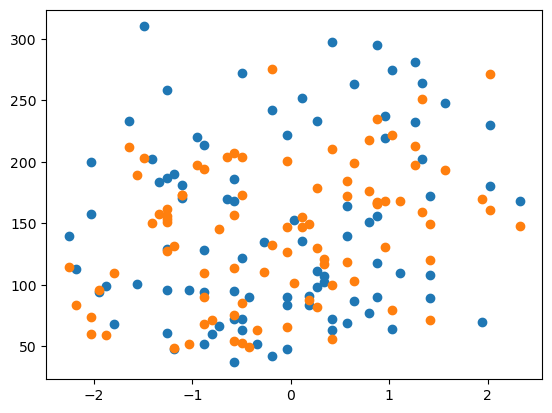

In [118]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
- 목표
    - RMSE 값 150 이하를 달성
    - 시각화 요구사항이 정확하게 이루어졌는가?

## Library, data 불러오기

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [120]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv").drop(columns=['casual', 'registered'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [121]:
train.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1 9.8400 14.3950   
1  2011-01-01 01:00:00       1        0           0        1 9.0200 13.6350   
2  2011-01-01 02:00:00       1        0           0        1 9.0200 13.6350   
3  2011-01-01 03:00:00       1        0           0        1 9.8400 14.3950   
4  2011-01-01 04:00:00       1        0           0        1 9.8400 14.3950   

   humidity  windspeed  count  
0        81     0.0000     16  
1        80     0.0000     40  
2        80     0.0000     32  
3        75     0.0000     13  
4        75     0.0000      1

## 변수 설명

- **`datetime`**: 시간별 날짜 + 타임스탬프
- **`season`**: 계절
    - 1: 봄 (spring)
    - 2: 여름 (summer)
    - 3: 가을 (fall)
    - 4: 겨울 (winter)
- **`holiday`**: 공휴일 여부 (1: 공휴일, 0: 아님)
- **`workingday`**: 근무일 여부 (주말이나 공휴일이 아니면 1)
- **`weather`**: 날씨
    - 1: 맑음, 약간 구름, 부분적 구름
    - 2: 안개 + 흐림, 안개 + 흩어진 구름, 안개
    - 3: 가벼운 눈/비, 천둥 번개
    - 4: 폭우, 폭설, 우박
- **`temp`**: 섭씨 온도
- **`atemp`**: 섭씨 체감 온도
- **`humidity`**: 상대 습도
- **`windspeed`**: 풍속
- **`casual`**: 비회원 대여 수 (제거함) (물론 회원 대비 비회원이 대여한 비율과 같은 변수를 만들어도 되지만.. 그냥 제거함)
- **`registered`**: 회원 대여 수 (제거함) (그런 비율로 만들어야 target에 직접적인 연관이 아닌 변수가 생성되기에)
- **`count`**: **총 대여 수 (Target)**

## 날짜 데이터 분리하기

In [122]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int32         
 12  day         10886 non-null  int32         
 13  hour        10886 non-null  int32         
 14  minute      10886 non-null  int32         
 15  second      10886 non-null  int32         
dtypes: datetime64[ns](1), 

## 시각화 EDA

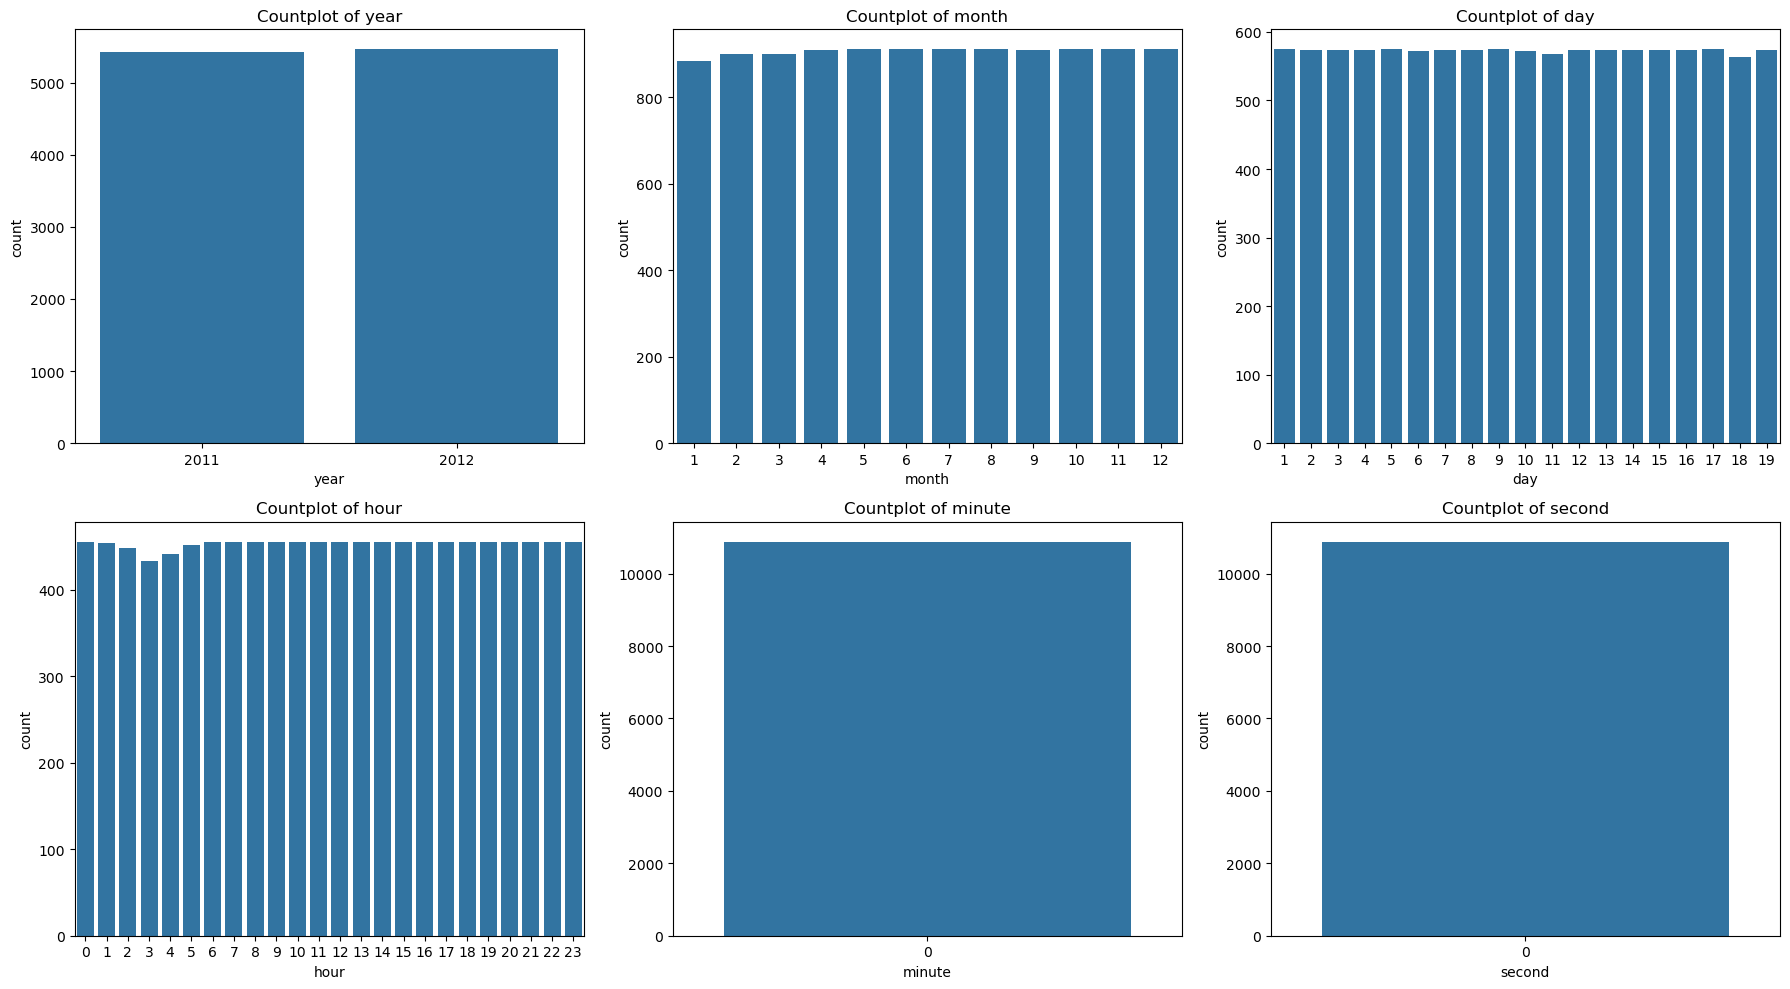

In [123]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

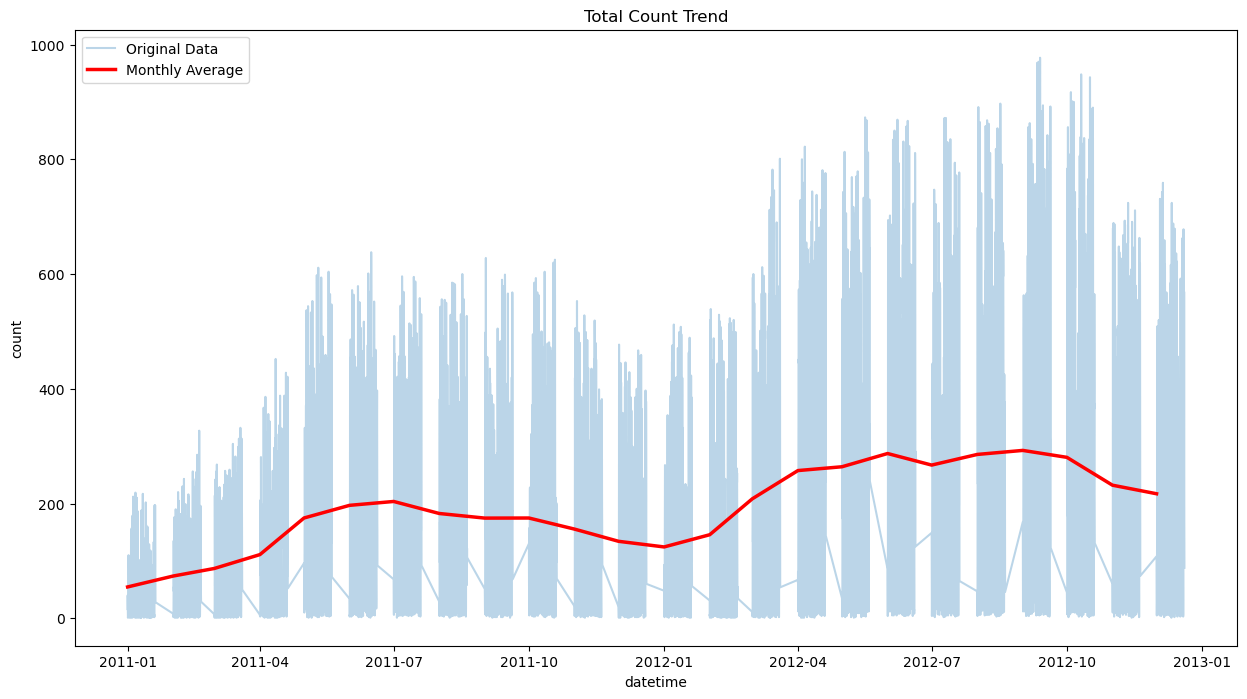

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x='datetime', y='count', data=train, ax=ax, label='Original Data', alpha=0.3)


monthly_agg = train.groupby(['year', 'month'])['count'].mean().reset_index()
monthly_agg['year_month'] = monthly_agg['year'].astype(str) + '-' + monthly_agg['month'].astype(str).str.zfill(2)
monthly_agg['datetime'] = pd.to_datetime(monthly_agg['year_month'])

sns.lineplot(x='datetime', y='count', data=monthly_agg, ax=ax, color='red', label='Monthly Average', linewidth=2.5)

ax.set_title('Total Count Trend')
ax.legend()

plt.show()

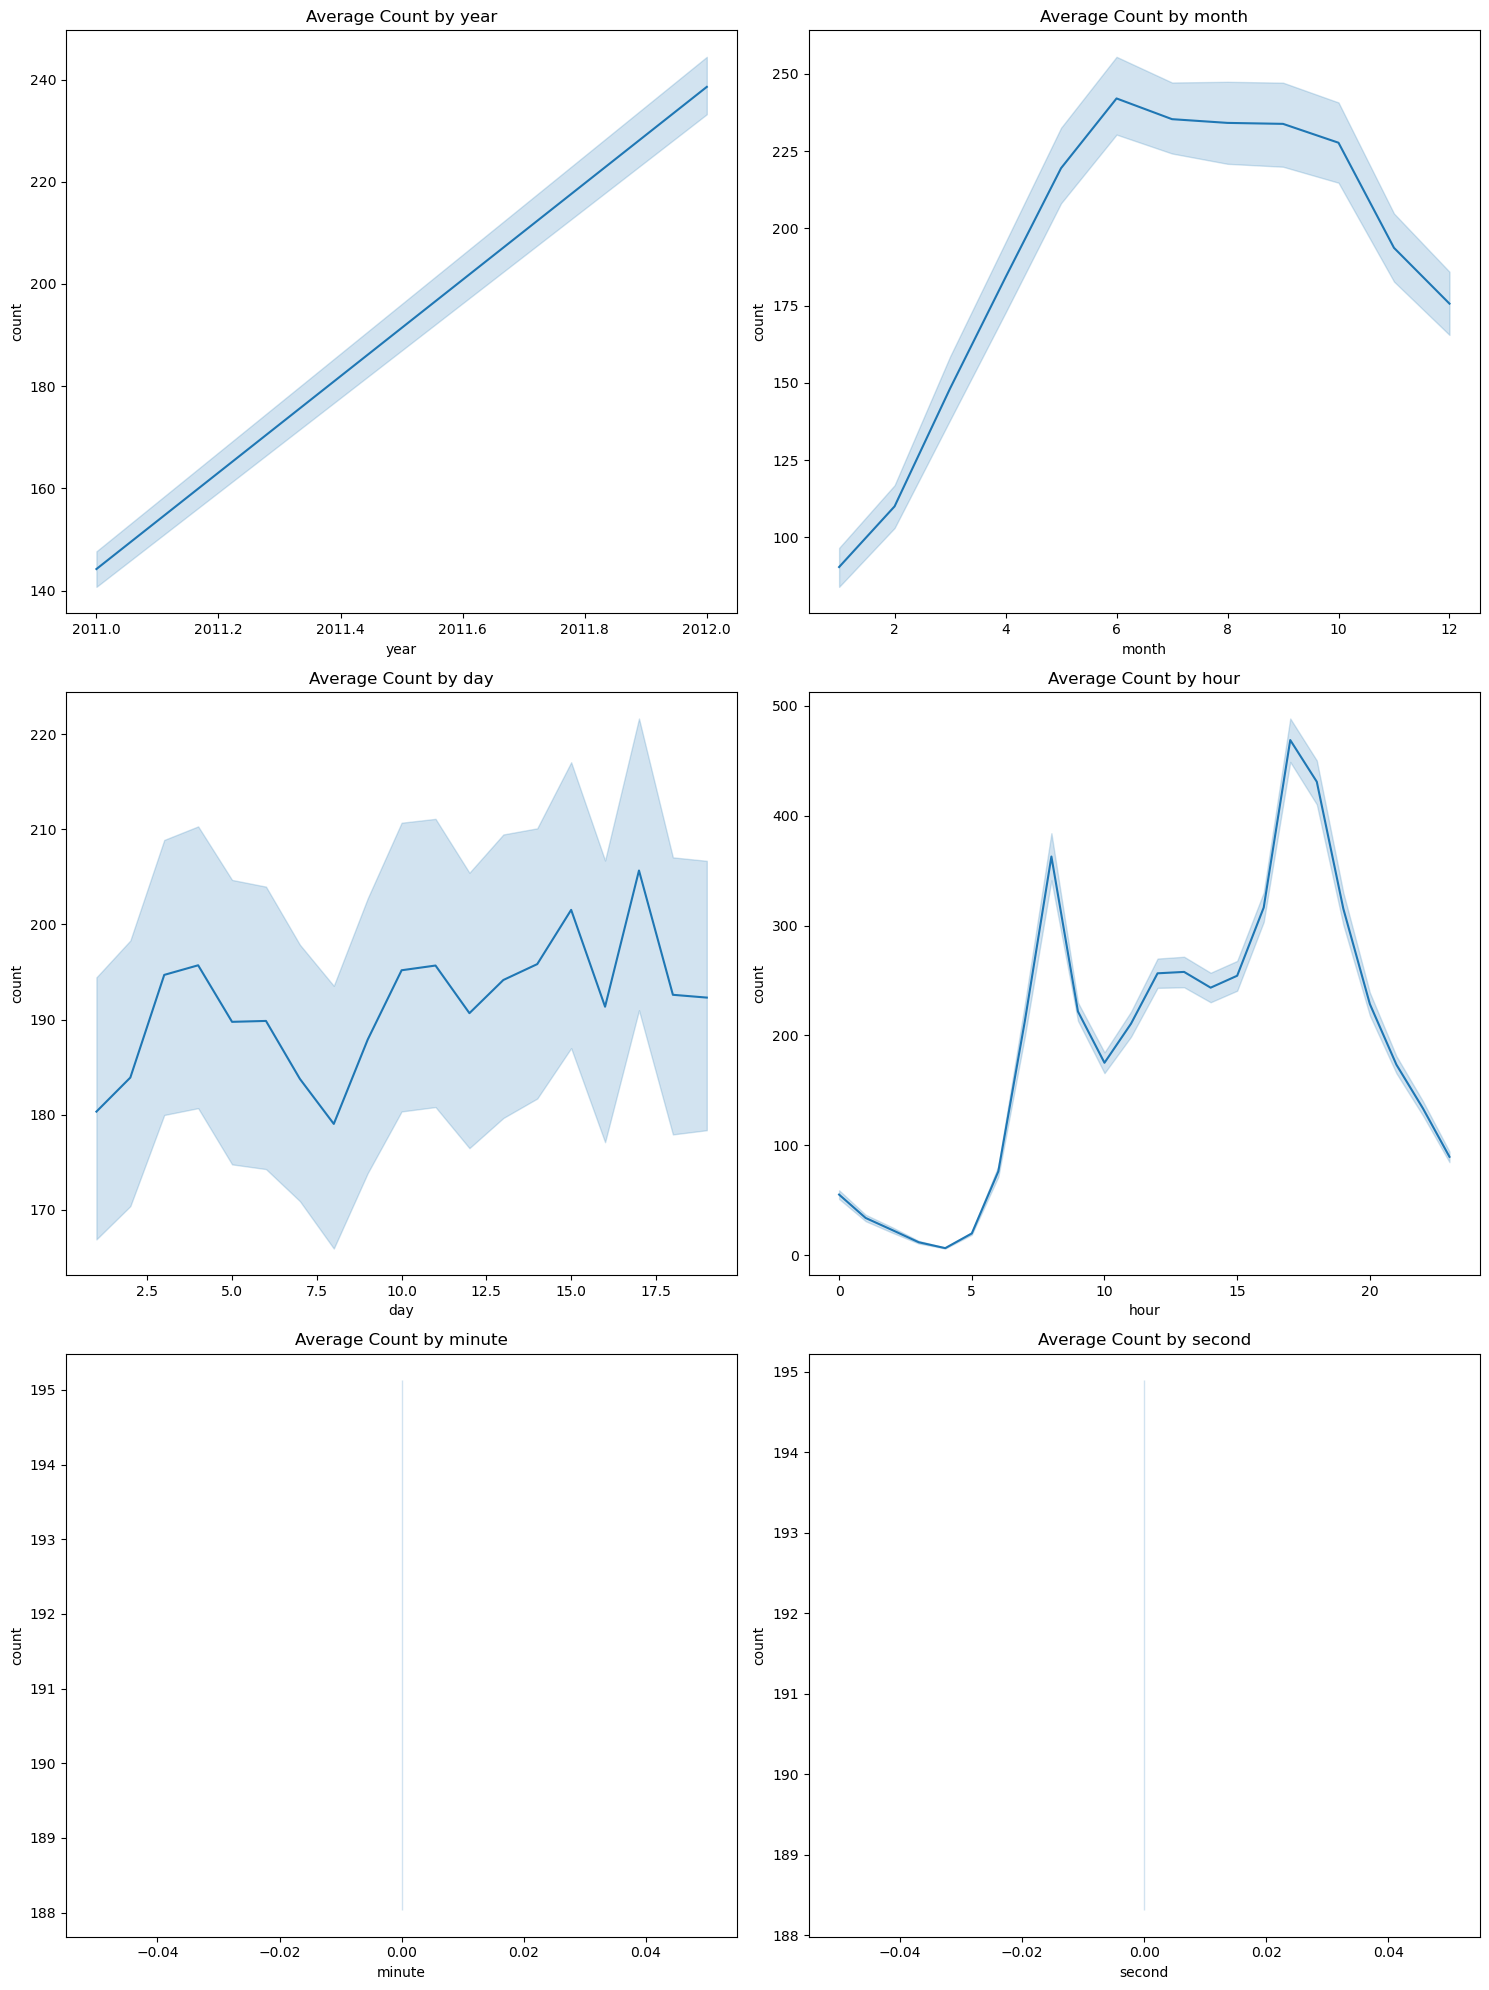

In [8]:
time_features = ['year', 'month', 'day', 'hour', 'minute', 'second']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(time_features):
    sns.lineplot(x=feature, y='count', data=train, ax=axes[i])
    axes[i].set_title(f'Average Count by {feature}')

plt.tight_layout()
plt.show()

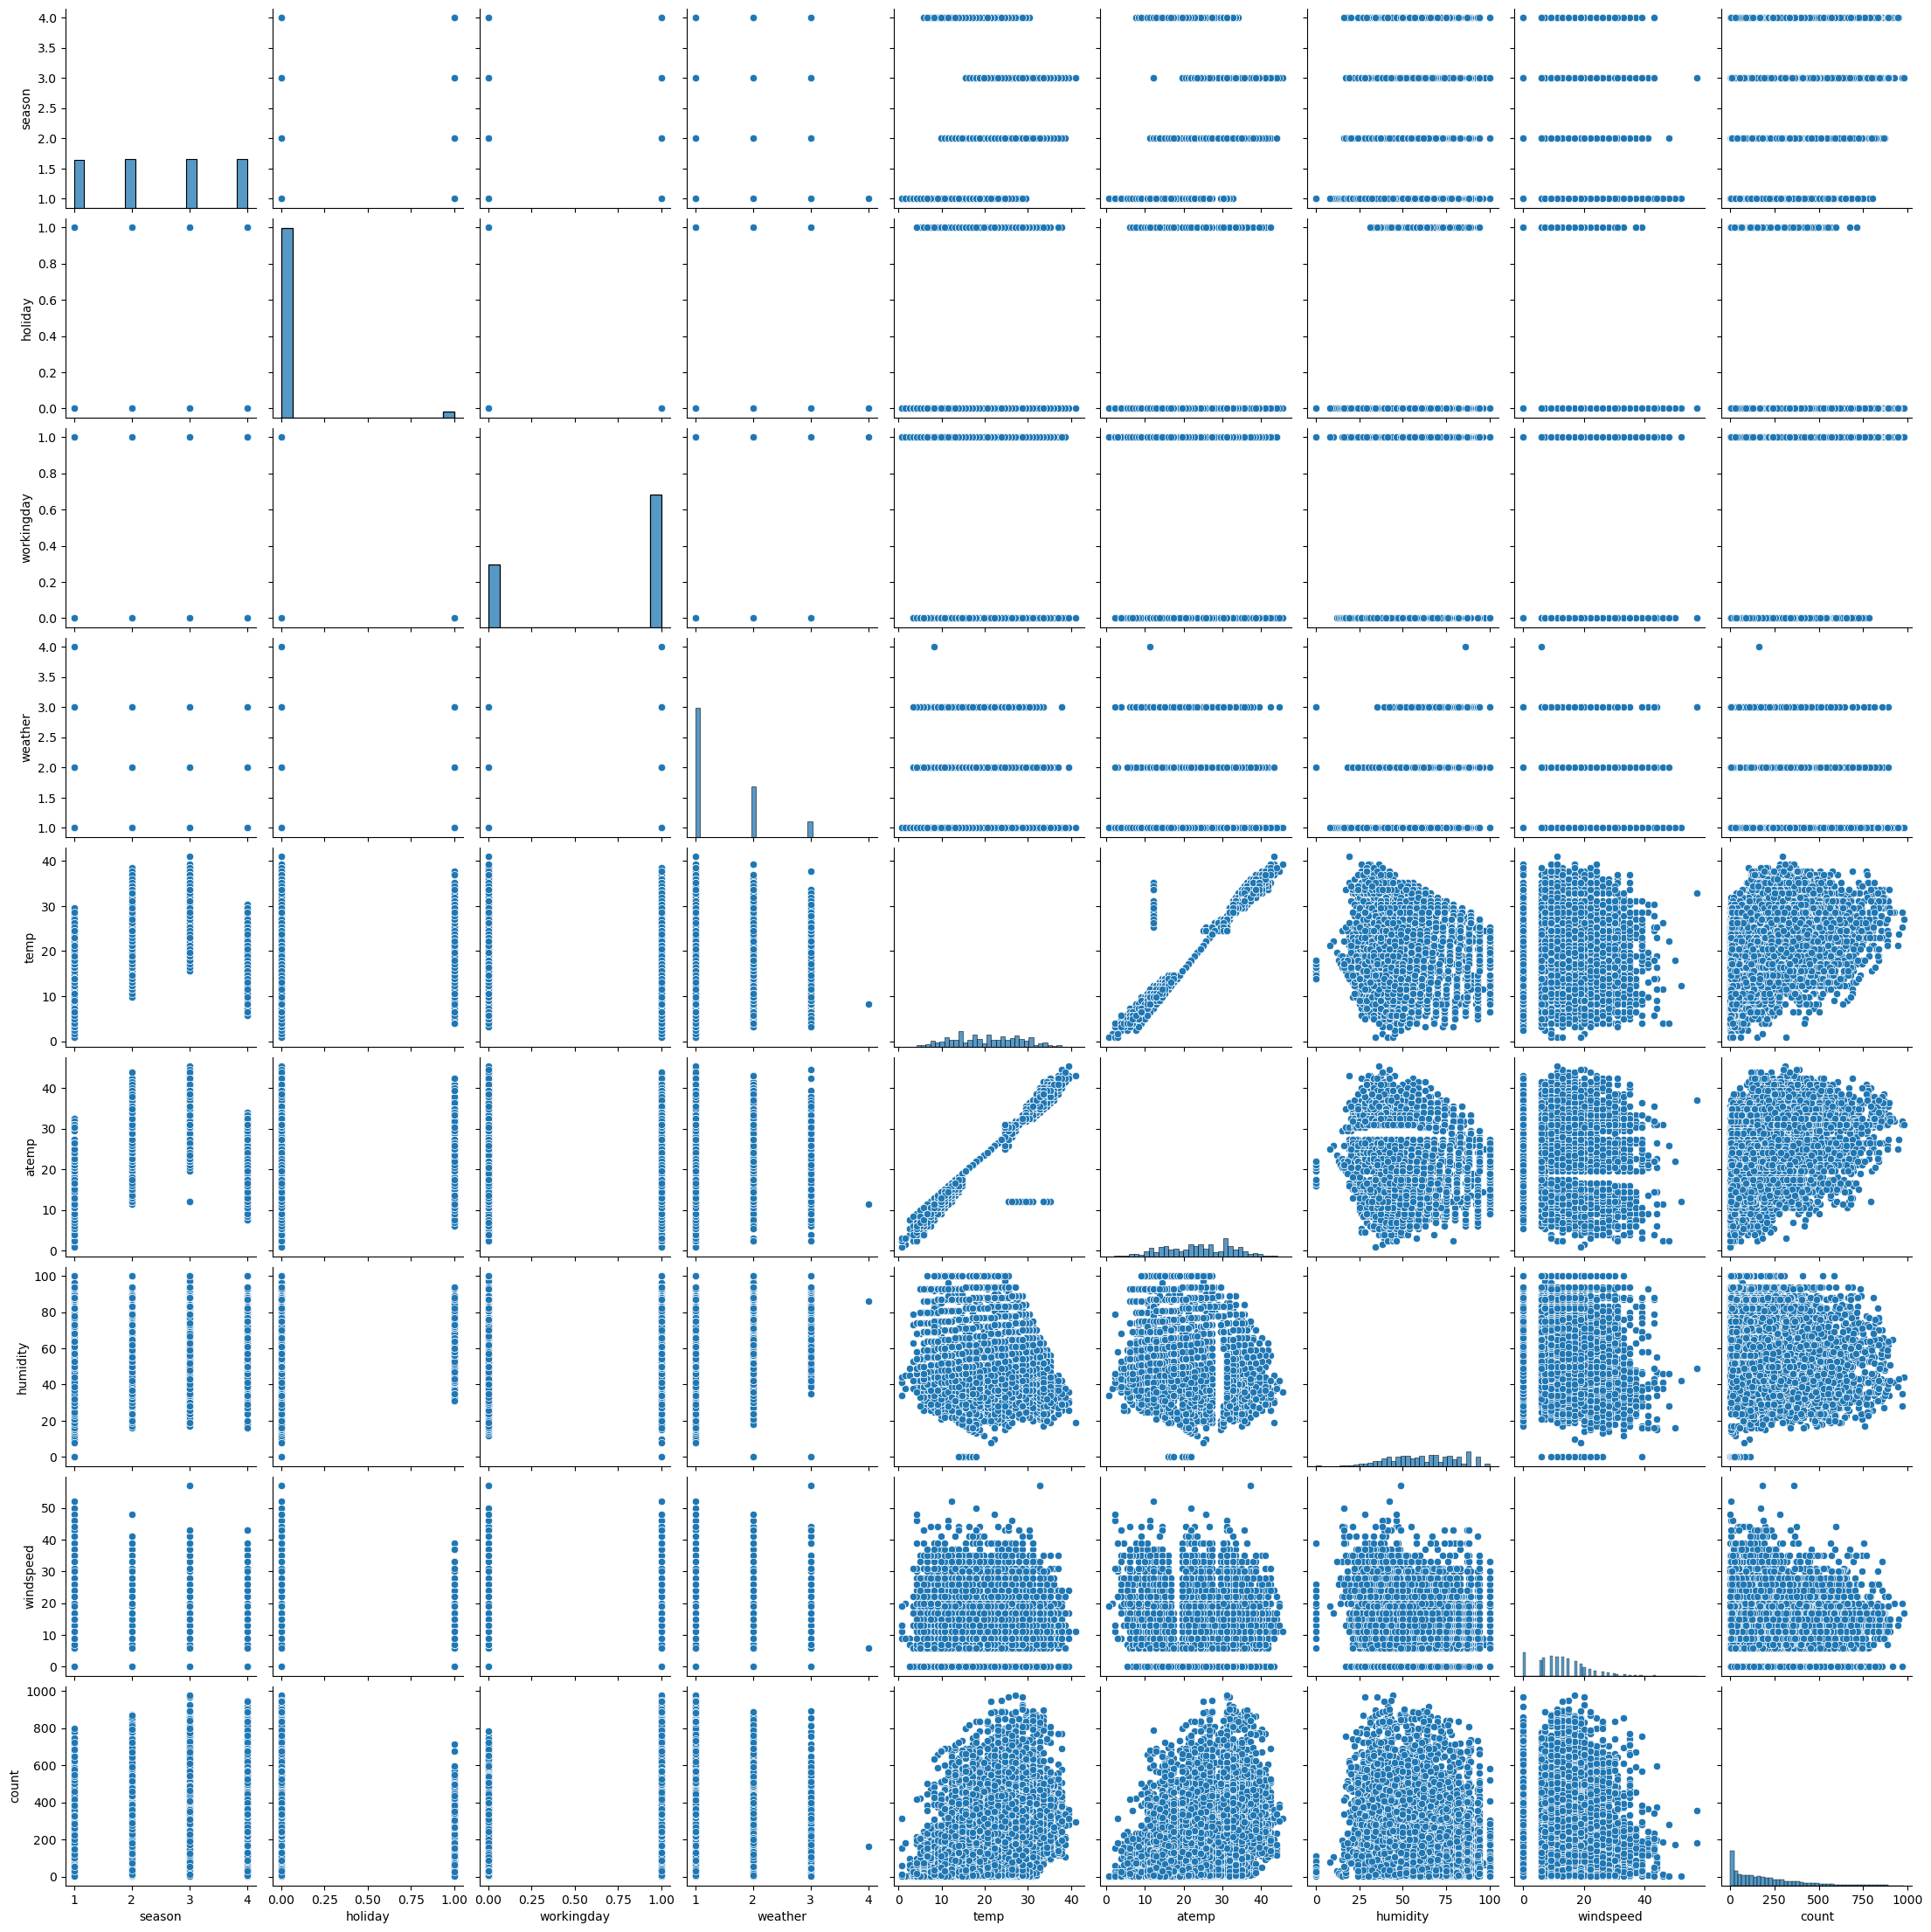

In [9]:
sns.pairplot(data=train.drop(columns=['datetime','year', 'month', 'day', 'hour', 'minute', 'second']))

<Axes: >

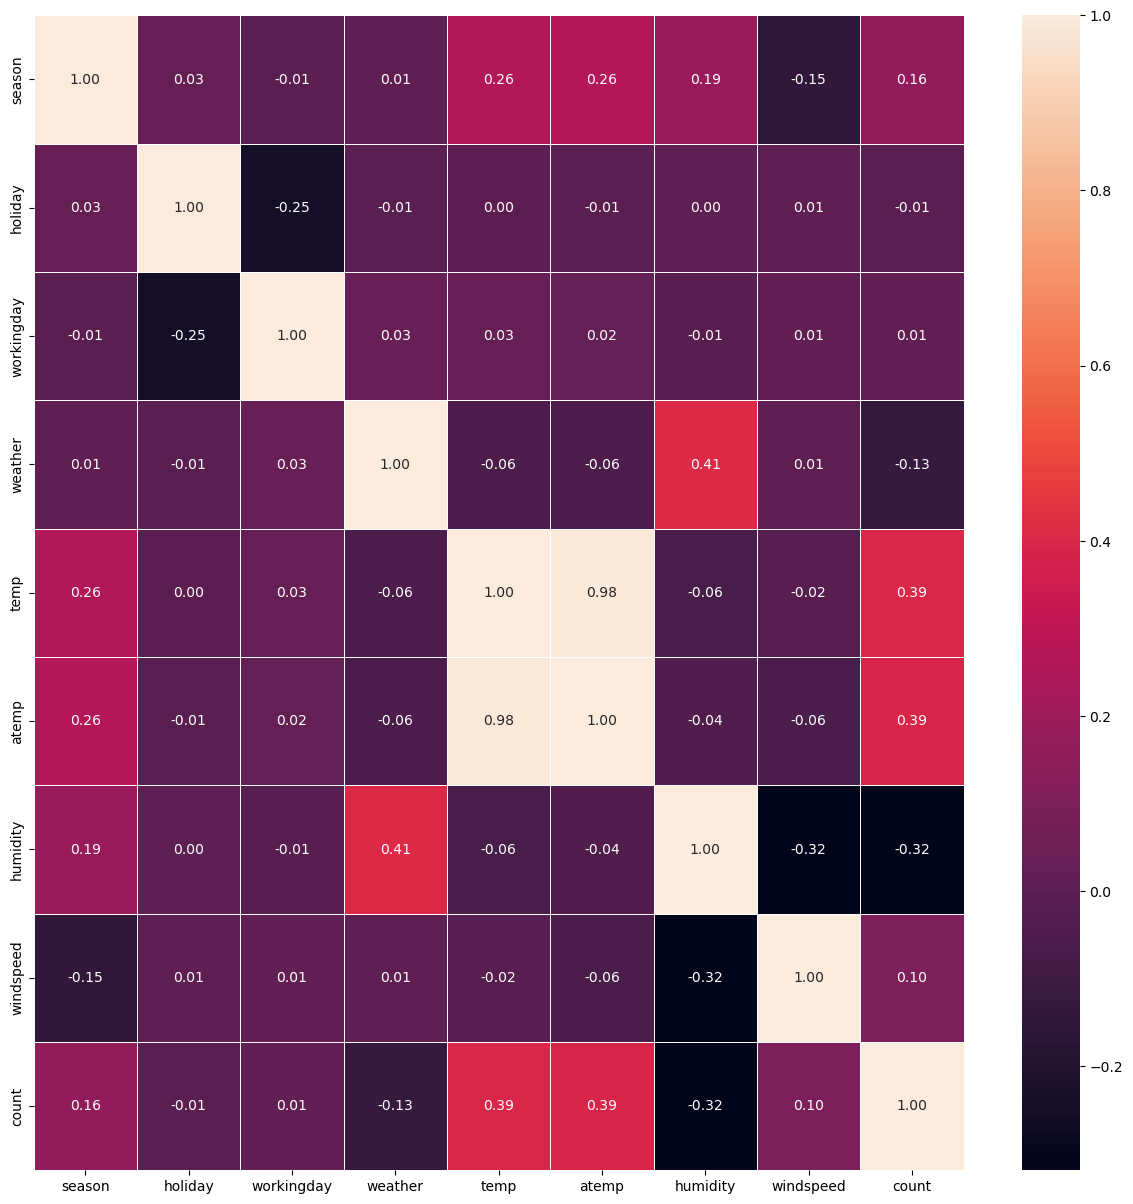

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.drop(columns=['datetime','year', 'month', 'day', 'hour', 'minute', 'second']).corr(), annot=True, fmt = '.2f', linewidths=.5)

## 전처리

In [142]:
ohe_col = ['season', 'holiday', 'workingday', 'weather']

train_ohe = pd.get_dummies(train, columns=ohe_col)
train_ohe.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'season_1', 'season_2',
       'season_3', 'season_4', 'holiday_0', 'holiday_1', 'workingday_0',
       'workingday_1', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [172]:
ss = StandardScaler()
ss_scaler = ss.fit_transform(train_ohe[['temp', 'atemp', 'humidity', 'windspeed']])
train_ohe_ss = pd.DataFrame(ss_scaler, columns=[f'{i}_ss' for i in train_ohe[['temp', 'atemp', 'humidity', 'windspeed']].columns])
train_ohe_ss = pd.concat([train_ohe, train_ohe_ss], axis=1)
train_ohe_ss.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'season_1', 'season_2',
       'season_3', 'season_4', 'holiday_0', 'holiday_1', 'workingday_0',
       'workingday_1', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'temp_ss', 'atemp_ss', 'humidity_ss', 'windspeed_ss'],
      dtype='object')

## 모델

In [170]:
features = ['year', 'month', 'day', 'hour'] + list(train_ohe_ss.loc[:,'season_1':].columns)

X = train_ohe_ss[features]
y = train_ohe_ss['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse) 

MSE: 19784.295155117932
RMSE: 140.65665698827743


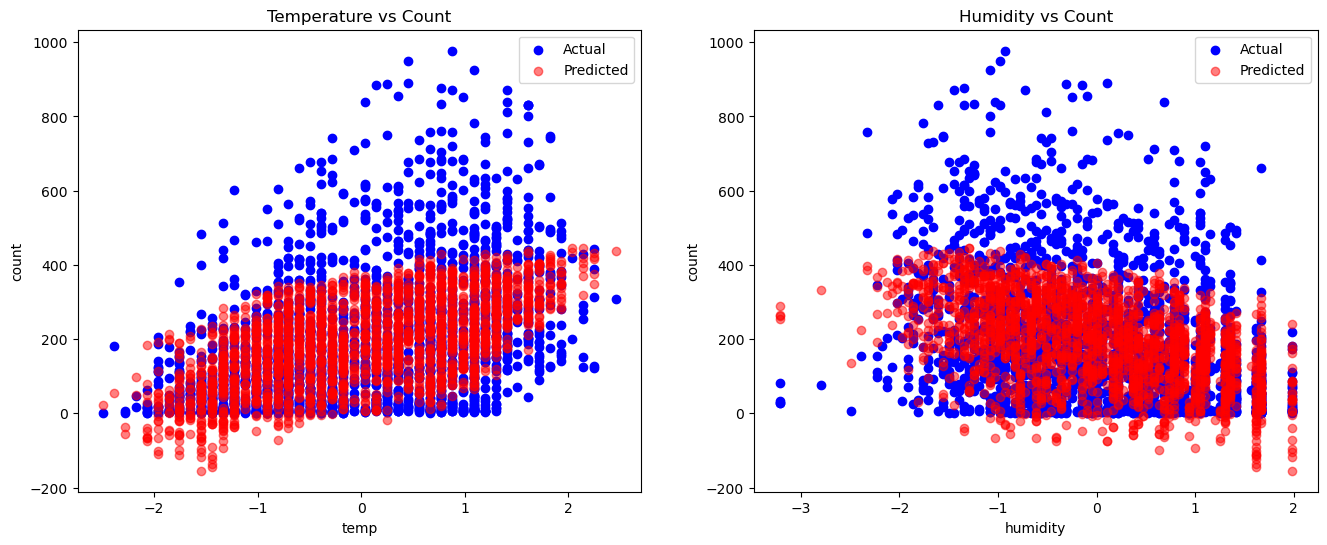

In [169]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp_ss'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp_ss'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity_ss'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity_ss'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [173]:
0.03*346

10.379999999999999